# Linear Regression

    predicting value of a Continous Random Variable using Indepenent Features
    
    their should exists linear dependency between Target (y) and Features (X) 

##### Model Based / Parametric Based Machine Learning Models


    Prediction Function / Hypothesis Function 
    
$$\hat y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... + \theta_n X_n$$

where $\theta$ is **parameter Vector** and **X** is a **feature Vector**


    Error Function 
        
        used to optimize parameters value, in linear regression most commonly we use Mean Squared Error also known as L2 Error
        
$$MSE = \frac { \sum\limits_{i=1}^N {(\hat y_i - y_i)}^2} {N} $$

    Peformance Metric
        
        do denote accuracy or performance of model
        
        MSE can be used as performance metric

#### Simple Linear Regression 

    y = mx + c
    
    m,c are  parameter
    
    x input feature
    
    y  prediction

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(121)

In [14]:
height = np.random.normal(160, 20, 1000)
weight = 0.35*height+np.random.normal(20, 5, 1000)

In [15]:
height.shape

(1000,)

In [16]:
weight.shape

(1000,)

### Our Target is to predict weight based on height

### EDA

    let's find out weather weight depends height or not
    
    if it depends on height we can use LinearRegression Model to predict weight using height

In [17]:
r =np.corrcoef(height, weight)[0, 1]

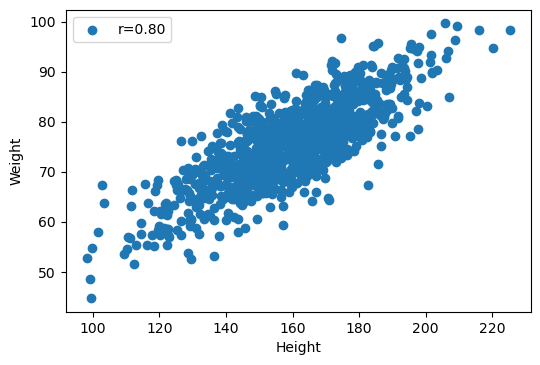

In [18]:
plt.figure(dpi=100)
plt.scatter(height, weight, label=f"r={r:.2f}")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

weight = m * height + c

In [19]:
from sklearn.metrics import mean_squared_error as mse

Error: 1675.095264833648


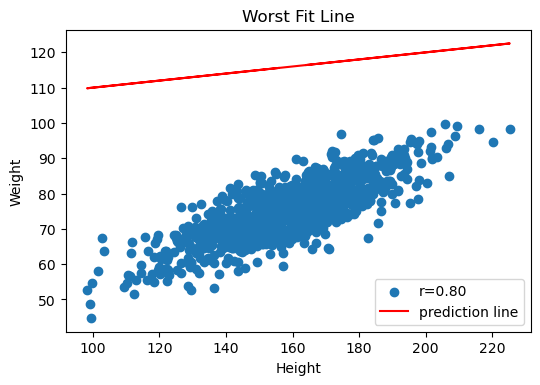

In [23]:
# Random Selection of Parameter values
m = 0.1
c = 100
y_hat = m*height+c
error = mse(weight, y_hat)
print(f"Error: {error}")
plt.figure(dpi=100)
plt.scatter(height, weight, label=f"r={r:.2f}")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(height, y_hat, label="prediction line", color='red')
plt.title("Worst Fit Line")
plt.legend()
plt.show()

Error: 169.11874885639216


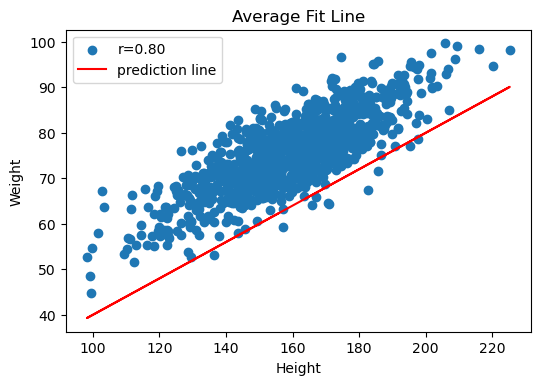

In [24]:
m = 0.4
c = 0

y_hat = m*height+c
error = mse(weight, y_hat)
print(f"Error: {error}")
plt.figure(dpi=100)
plt.scatter(height, weight, label=f"r={r:.2f}")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(height, y_hat, label="prediction line", color='red')
plt.title("Average Fit Line")
plt.legend()
plt.show()

Error: 25.297739416345095


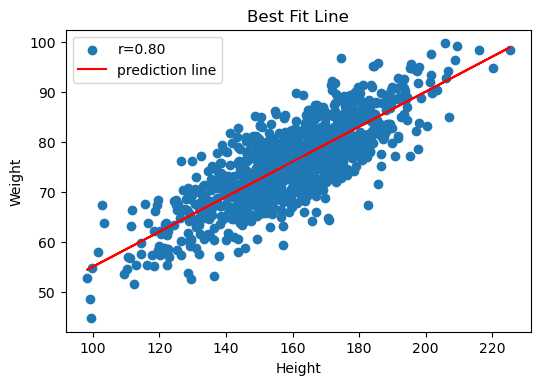

In [26]:
m = 0.35
c = 20

y_hat = m*height+c
error = mse(weight, y_hat)
print(f"Error: {error}")
plt.figure(dpi=100)
plt.scatter(height, weight, label=f"r={r:.2f}")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(height, y_hat, label="prediction line", color='red')
plt.title("Best Fit Line")
plt.legend()
plt.show()

$$ \hat y = \hat mx + \hat c$$

$$ mse = \frac {\sum{(\hat y_i - y_i)}^2} {N}$$

$$ \hat m = \frac {\sum(\bar y - y_i)(\bar x - x_i)} {\sum{(\bar x - x_i)}^2} $$

$$ \hat c = \bar y - m \bar x$$

y = weight
x = height

In [34]:
m = (((weight.mean() - weight)*(height.mean()-height)).sum()) / ((height.mean()-height)**2).sum()
print("Coeff: ", m) # Fitting / Learning

Coeff:  0.3457906709291433


In [35]:
c = weight.mean() - m*height.mean()
print("Intercept: ", c)

Intercept:  20.56916653282198


In [42]:
def MAE(y, y_hat):
    return np.abs(y-y_hat).sum()/len(y)

In [43]:
y_hat = m*height+c

In [44]:
weight[:5]

array([72.48491948, 73.62876092, 73.50487588, 66.32794609, 74.02455   ])

In [45]:
y_hat[:5]

array([74.42929207, 73.92515691, 71.92670095, 72.85057092, 73.61269087])

In [46]:
error = MAE(weight, y_hat)
print("Error: ", error)

Error:  4.052278759884578


In [49]:
# prediction
h = float(input("height: "))
pred_weight = h*m + c
print(f"weight should be : {pred_weight:.2f}+-{error:.2f}")

height: 160
weight should be : 75.90+-4.05


#### Visualization

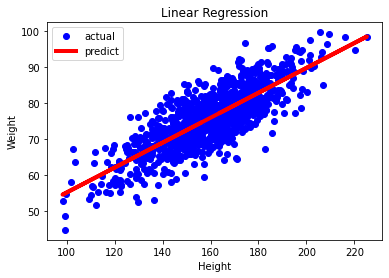

In [51]:
plt.plot(height, weight, 'bo', label="actual")
plt.plot(height, y_hat, 'r-', label="predict", lw=4)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Linear Regression")
plt.legend()
plt.show()

    hyparameter-> parameters on which training depends but they don't depend on training, passed during creation of a model

#### Simple Linear Regression 

    From Scratch

In [60]:
class MyLinearRegression:
    def __init__(self, **kwargs):
        self.coef_ = None # m 
        self.intercept_ = None # c 
    def fit(self, X, y):
        xbar = X.mean()
        ybar = y.mean()
        self.coef_ = ((ybar-y)*(xbar-X)).sum()/((xbar-X)**2).sum()
        self.intercept_ = ybar - self.coef_*xbar
        return self
    def predict(self, X):
        return self.intercept_ + self.coef_ * X
    def __repr__(self):
        return f"MyLinearRegression()"
        
def MSE(y, y_hat):
    return ((y-y_hat)**2).sum()/len(y)
        

In [61]:
model = MyLinearRegression()

In [62]:
model.fit(height, weight)

MyLinearRegression()

In [63]:
model.intercept_ # C

20.56916653282198

In [64]:
model.coef_ # m

0.3457906709291433

In [65]:
model.predict(np.array([145, 160, 170, 180]))
# sklearn only accepts X as 2D Array

array([70.70881382, 75.89567388, 79.35358059, 82.8114873 ])

In [66]:
y_pred = model.predict(height)

In [67]:
error = MSE(weight, y_pred)
print("MSE: ", error)

MSE:  25.28102124836484


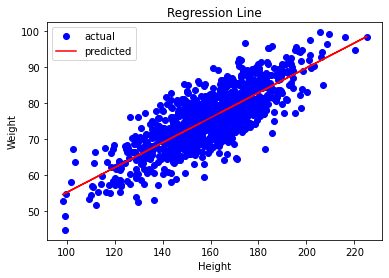

In [68]:
plt.plot(height, weight, 'bo', label='actual')
plt.plot(height, y_pred, 'r-', label='predicted')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Regression Line")
plt.legend()
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [70]:
sk_model = LinearRegression()
my_model = MyLinearRegression()

In [73]:
sk_model.fit(height.reshape(-1, 1), weight)

LinearRegression()

In [74]:
my_model.fit(height, weight)

MyLinearRegression()

In [75]:
sk_model.intercept_

20.56916653282198

In [76]:
my_model.intercept_

20.56916653282198

In [77]:
sk_model.coef_

array([0.34579067])

In [78]:
my_model.coef_

0.3457906709291433

In [79]:
sk_model.predict(np.array([145, 160, 170, 180]).reshape(-1, 1))

array([70.70881382, 75.89567388, 79.35358059, 82.8114873 ])

In [81]:
my_model.predict(np.array([145, 160, 170, 180]))

array([70.70881382, 75.89567388, 79.35358059, 82.8114873 ])

SkLearn

    1. Initlize Model  model = LinearRegression()
    2. Train Model using fit function (know you know how it happens) model.fit(X_train, y_train)
    3. Predict using Trained Model # model.predict(X_test)